***В 1 ячейке:***

импортируем все необходимые библиотеки для дальнейшей работы с датасетом

**pandas** - библиотека для обработки и анализа данных.

**numpy** - библиотека с инструментами для работы с массивами, матрицами и числовыми данными в целом. 

**matplotlib.pyplot** - инструменты для создания диаграмм, графиков и т.д.

**statsmodels.api** - необходима для анализа временного ряда.

**ARIMA** - это метод моделирования временных рядов для прогнозирования будущих значений на основе прошлых значений.

**mean_absolute_error и mean_squared_error** - это функции из библиотеки **sklearn.metrics**, для оценки точности модели временных рядов путем сравнения прогнозируемых значений с фактическими значениями.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA 
from sklearn.metrics import mean_absolute_error, mean_squared_error

***Во 2 ячейке:***

загружаем и выводим датасет на экран при помощи функции **read_csv**

столбец **"date"** будет использоватся в качестве индекса 

также удаляется столбец **"Name"** из фрейма данных, при помощи функции **drop()**

In [54]:
df = pd.read_csv('AAP_data.csv' , index_col='date', parse_dates=['date'])
df = df.drop(['Name'], axis=1)
df

,open,high,low,close,volume
date,,,,,
2013-02-08,78.34,79.7200,78.0100,78.90,1298137
2013-02-11,78.65,78.9100,77.2300,78.39,758016
2013-02-12,78.39,78.6300,77.5132,78.60,876859
2013-02-13,78.90,79.1300,77.8500,78.97,1038574
2013-02-14,78.66,79.7200,78.5850,78.84,1005376
...,...,...,...,...,...
2018-02-01,116.24,118.8300,115.8300,117.29,760629
2018-02-02,115.92,117.1800,113.1250,113.93,1092333
2018-02-05,113.05,114.9700,109.8100,109.86,1281592


***В 3 ячейке:***

**df.describe()** - суммирует статистические показатели столбцов входного фрейма данных **df**.

**df.corr()** - содержит коэффициенты попарной корреляции между столбцами.

In [3]:
print(df.describe())
print(df.corr())

              open         high          low        close        volume
count  1259.000000  1259.000000  1259.000000  1259.000000  1.259000e+03
mean    132.439631   133.818297   131.036025   132.433463  1.078043e+06
std      31.269628    31.545809    30.968405    31.274463  1.019365e+06
min      76.040000    76.660000    75.623000    76.180000  1.307120e+05
25%     104.070000   105.724950   102.260000   104.440000  6.182010e+05
50%     141.150000   143.000000   139.405000   141.300000  8.491350e+05
75%     156.980000   158.270000   155.320000   156.730000  1.219762e+06
max     201.240000   201.240000   198.160000   200.380000  1.974952e+07
            open      high       low     close    volume
open    1.000000  0.998957  0.999041  0.998220 -0.062003
high    0.998957  1.000000  0.998468  0.999176 -0.046064
low     0.999041  0.998468  1.000000  0.998940 -0.075223
close   0.998220  0.999176  0.998940  1.000000 -0.061595
volume -0.062003 -0.046064 -0.075223 -0.061595  1.000000


***В 4 ячейке:***

**df.index.unique()** - возвращает массив уникальных меток индекса датасета

In [4]:
df.index.unique()

DatetimeIndex(['2013-02-08', '2013-02-11', '2013-02-12', '2013-02-13',
               '2013-02-14', '2013-02-15', '2013-02-19', '2013-02-20',
               '2013-02-21', '2013-02-22',
               ...
               '2018-01-25', '2018-01-26', '2018-01-29', '2018-01-30',
               '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-05',
               '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', name='date', length=1259, freq=None)

***В 5 ячейке:*** 

отображаем график цен на акции за определенный период времени при помощи **plt.plot.**

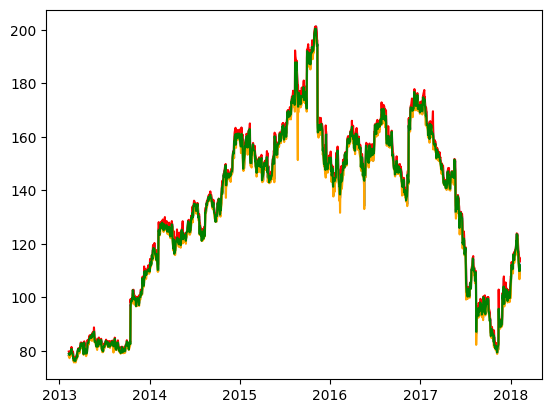

In [12]:
plt.plot(df.index, df['open'])
plt.plot(df['high'], color='red')
plt.plot(df.index, df['low'], color='orange')
plt.plot(df.index, df['close'], color='green')
plt.show()

***В 6 ячейке:***

выводим данные о торговом объеме датасета в виде графика

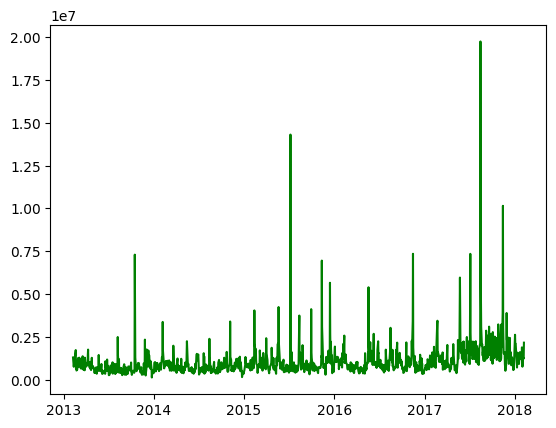

In [23]:
plt.plot(df.index, df['volume'], color = 'green')
plt.show()

***В 7 ячейке:***

Создаем временной ряд **ts** на основе столбца **"volume"** при помощи pd.Series

Строим графики разложения, которые отображают исходный временной ряд, тренд, сезонные компоненты и остатки.

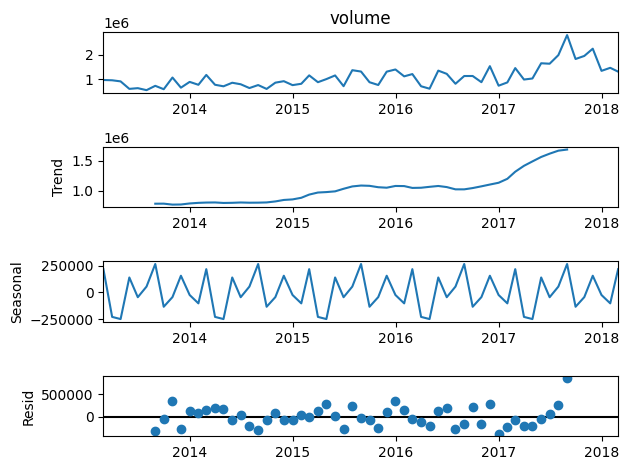

In [20]:
ts = pd.Series(df.volume, index=df.index)
ts_resampled = ts.resample('M').mean()
decomposition = sm.tsa.seasonal_decompose(ts_resampled)
decomposition.plot()
plt.show()

***В 8 ячейке:***

Создаем новый датасет **df_tr** с индексом, равным индексу **df**

добавляем, а затем применяем столбец **"volume"**

создаем график на основе полученных данных

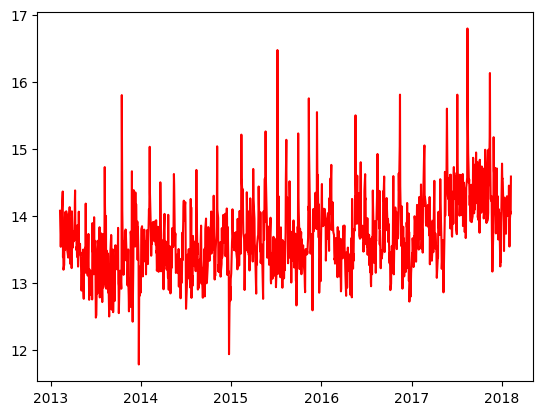

In [22]:
df_tr = pd.DataFrame(index=df.index)
df_tr['volume'] = df.volume
df_tr.volume = np.log(df_tr['volume'])
plt.plot((df_tr), color = 'red')
plt.show()

***В 9 ячейке:***

Создаем объект модели **ARIMA** с указанными параметрами **p, d, q**

обучаем модель при помощи **model.fit**

Прогнозируем значения временного ряда в заданном диапазоне дат при помощи **predict **

In [57]:
model = ARIMA(df_tr, order=(2, 1, 0))
model_fit = model.fit()
pred = model_fit.predict(start='2016-02-01', end='2018-02-07')

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


***В 10 ячейке:***

выводим полученный прогноз на экран в виде графика

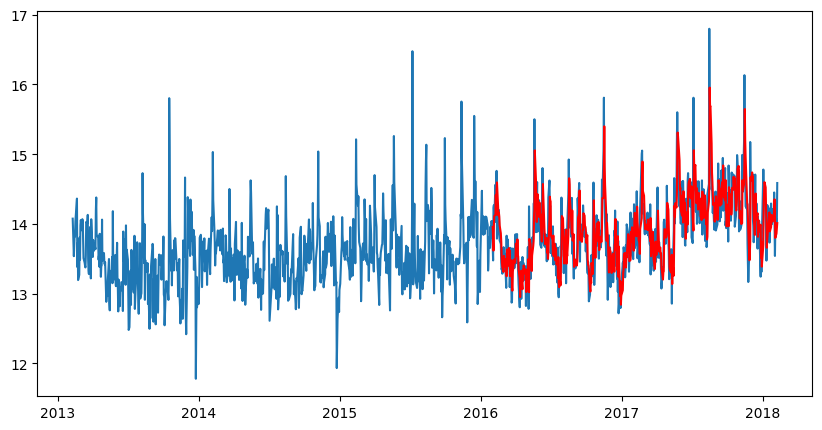

In [58]:
plt.figure(figsize=(10, 5))
plt.plot(df_tr)
plt.plot(pred, color='red')
plt.show()

***В 11 ячейке:***

генерируем прогноз будущих значений временного ряда с использованием **ARIMA**

вычисляем **MAE**(средняя абсолютная ошибка), **MSE**(средняя квадратичная ошибка) между исходными данными и прогнозируемыми данными

вычисляем **AIC**(оценка информационного критерия Akaike) и **BIC**(оценка байесовского информационного критерия) для соответствия модели **ARIMA**

выводим результат на экран при помощи **print**

In [51]:
forecast = model_fit.forecast(steps=len(df_tr['2016-02-01':'2018-02-07']))
mae = mean_absolute_error(df_tr['2016-02-01':'2018-02-07'], pred)
mse = mean_squared_error(df_tr['2016-02-01':'2018-02-07'], pred)
aic_score = model_fit.aic
bic_score = model_fit.bic
print('MAE: %.3f' % mae)
print('MSE: %.3f' % mse)
print('AIC score:', aic_score)
print('BIC score:', bic_score)

MAE: 0.320
MSE: 0.175
AIC score: 1481.2465755145495
BIC score: 1496.6584108263307


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


***В 12 ячейке:***

выполняем анализ временных рядов в **df**, перебирая все столбцы, кроме столбца **"volume"**.(при помощи цикла **for**)

делаем прогноз с определенным набором дат, используя модель **ARIMA**

отображаем фактические и прогнозируемые значния

вычисляем **MAE** и **MSE** и выводим результат на экран при помощи **print**

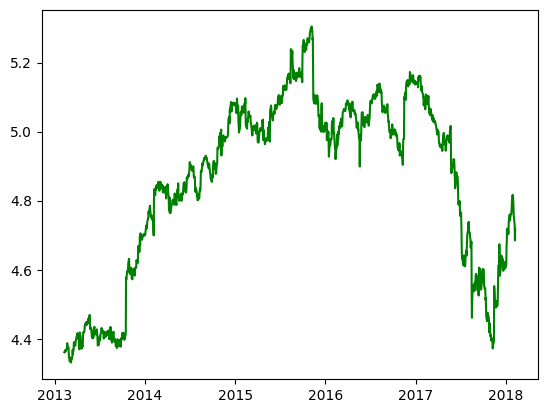

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


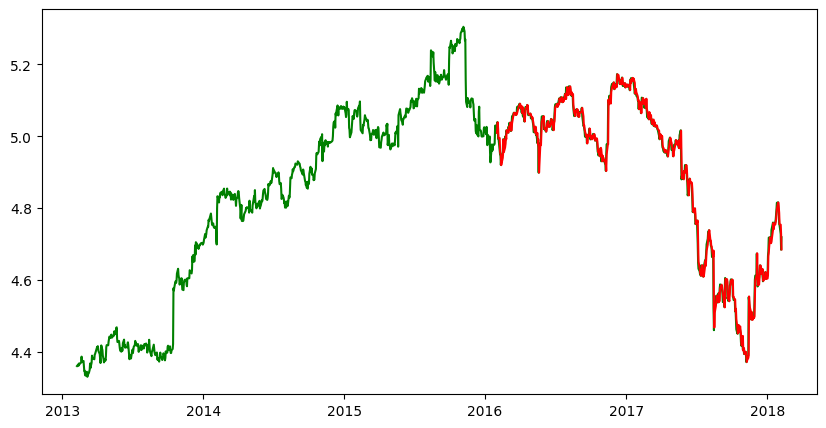

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MAE: 0.320
MSE: 0.175


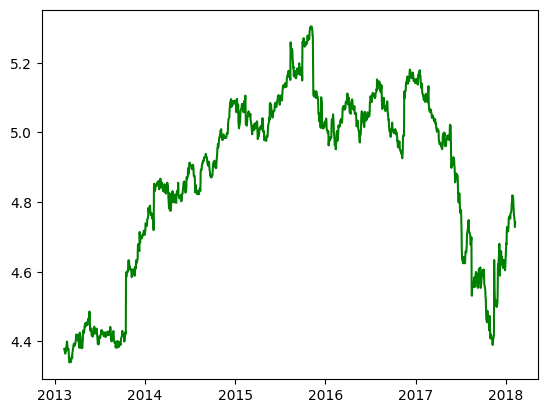

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/l

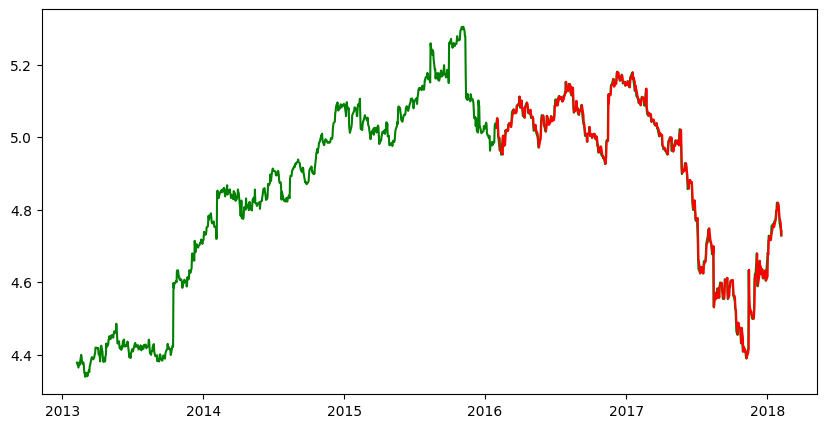

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MAE: 0.320
MSE: 0.175


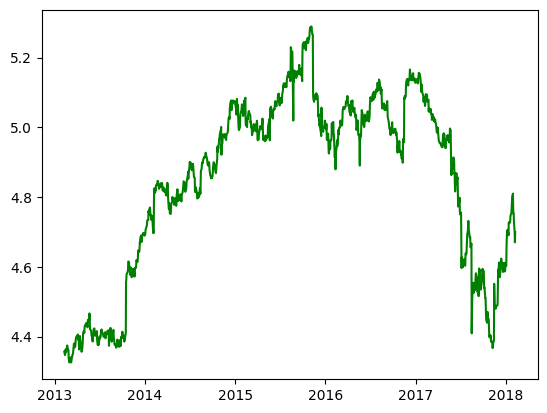

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


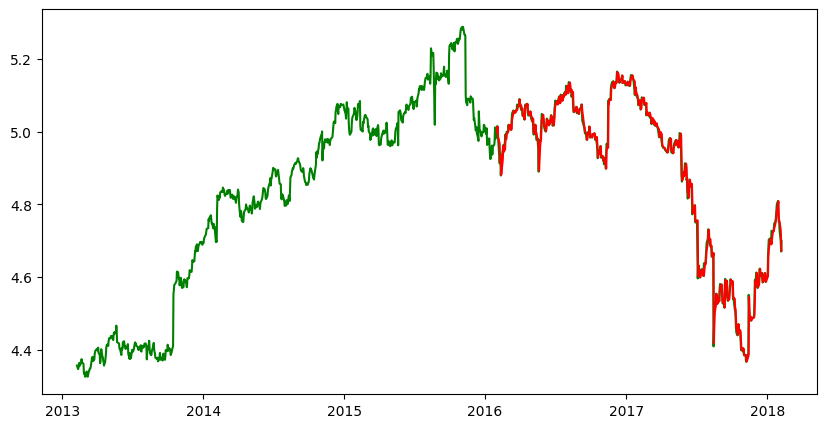

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MAE: 0.320
MSE: 0.175


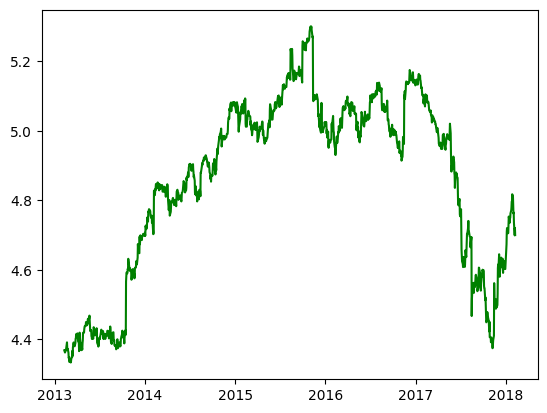

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


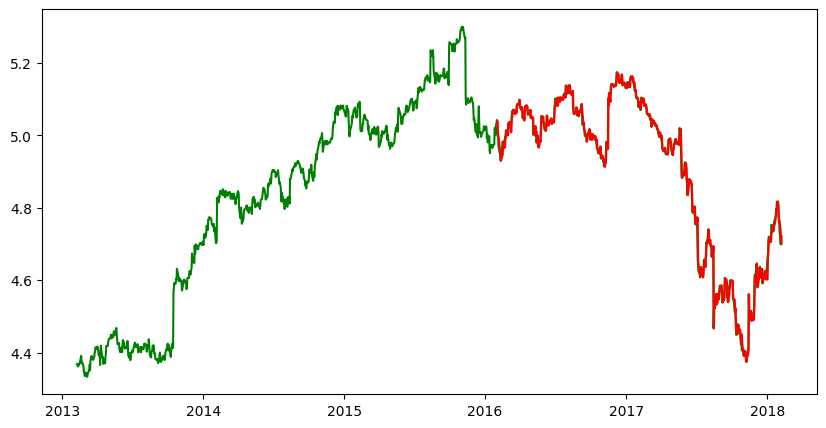

MAE: 0.320
MSE: 0.175


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [52]:
dft = df.copy()
for col in dft.columns:
    if col != 'volume':
        dft[col] = np.log(dft[col])
        plt.plot(dft[col], color='green')
        plt.show()
        model_ = ARIMA(dft[col], order=(2, 1, 2))
        model_fit_ = model_.fit()
        pred_ = model_fit_.predict(start='2016-02-01', end='2018-02-07')
        plt.figure(figsize=(10, 5))
        plt.plot(dft[col], color='green')
        plt.plot(pred_, color='red')
        plt.show()
        forecast = model_fit.forecast(steps=len(dft[col]['2016-02-01':'2018-02-07']))
        mae_ = mean_absolute_error(dft[col]['2016-02-01':'2018-02-07'], pred_)
        mse_ = mean_squared_error(dft[col]['2016-02-01':'2018-02-07'], pred_)
        print('MAE: %.3f' % mae)
        print('MSE: %.3f' % mse)